In [1]:
#!pip install imblearn

In [2]:
#!pip install imblearn --user

In [3]:
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,  confusion_matrix, f1_score, make_scorer, roc_auc_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [4]:
df_original = pd.read_csv('telecommunications_churn.csv')
df = df_original.copy()
print(df.shape)
df

(3333, 19)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0


# Exploratory Data Analysis

In [3]:
pd.set_option('display.max_columns', None)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

#### Inferences

1. No Null values in the dataframe
2. All datatypes are in accordance to the values in the columns

In [5]:
df.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754,0.144914
std,39.822106,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,243.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000


#### Inferences
1. Average minutes a person is talking on the phone during day, evening, night time is almost same.
2. Average number of calls made during day, evening, night time are almost same.
3. However, average Day charge is highest followed by evening and night charge
4. day:evening:night charges are in the ratio 4:2:1

In [6]:
df[df.duplicated()]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn


#### Inference
1. No duplicate rows present in the dataframe

<AxesSubplot:xlabel='day_charge', ylabel='total_charge'>

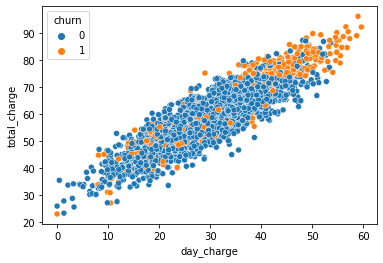

In [7]:
sns.scatterplot(df.day_charge, df.total_charge, hue=df.churn)

#### Inferences
1. Day charge is highly positively related to the total charge - 88%
2. Evening charege is less positively related to the total charge - 41%
3. Night charge is least positively related to the total charge - 21%

<AxesSubplot:xlabel='evening_charge', ylabel='total_charge'>

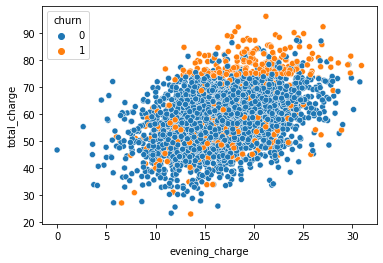

In [8]:
sns.scatterplot(df.evening_charge, df.total_charge, hue=df.churn)

<AxesSubplot:xlabel='night_charge', ylabel='total_charge'>

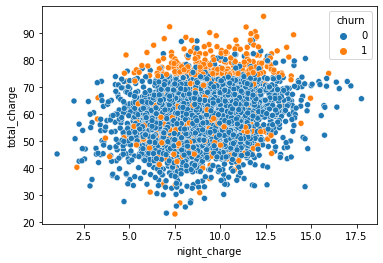

In [9]:
sns.scatterplot(df.night_charge, df.total_charge, hue=df.churn)

0    2850
1     483
Name: churn, dtype: int64


<AxesSubplot:xlabel='churn', ylabel='count'>

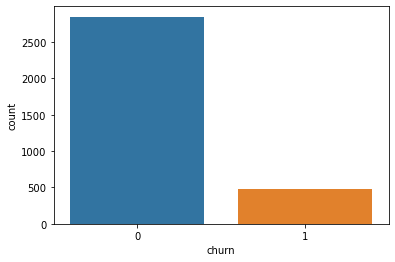

In [10]:
print(df['churn'].value_counts())
sns.countplot(df['churn'])

#### Inferences
1. Churn vs Non-churn customers ratio is 1:6
2. Churn minority class - 483 customers 
3. Non-churn - majority class - 2850 customers

<AxesSubplot:xlabel='churn', ylabel='account_length'>

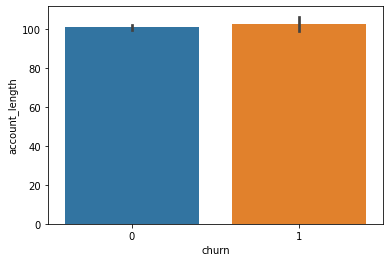

In [11]:
sns.barplot(df.churn, df.account_length)

#### Account length has no effect on churning rate

<AxesSubplot:xlabel='voice_mail_plan', ylabel='count'>

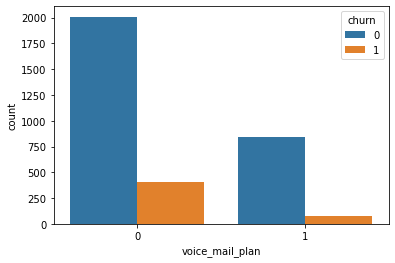

In [12]:
sns.countplot(df.voice_mail_plan, hue='churn', data=df)

#### Those who have no voice_mail_plan are high churners

In [13]:
# those who have no voice mail plan are high churners
df[(df.voice_mail_plan == 0) & (df.churn == 1)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
10,65,0,0,129.1,228.5,208.8,12.7,4,0,137,21.95,83,19.42,111,9.40,6,3.43,54.20,1
15,161,0,0,332.9,317.8,160.6,5.4,4,0,67,56.59,97,27.01,128,7.23,9,1.46,92.29,1
21,77,0,0,62.4,169.9,209.6,5.7,5,0,89,10.61,121,14.44,64,9.43,6,1.54,36.02,1
33,12,0,0,249.6,252.4,280.2,11.8,1,0,118,42.43,119,21.45,90,12.61,3,3.19,79.68,1
48,119,0,0,159.1,231.3,143.2,8.8,5,0,114,27.05,117,19.66,91,6.44,3,2.38,55.53,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,84,0,0,280.0,202.2,156.8,10.4,0,0,113,47.60,90,17.19,103,7.06,4,2.81,74.66,1
3304,71,0,0,186.1,198.6,206.5,13.8,4,1,114,31.64,140,16.88,80,9.29,5,3.73,61.54,1
3320,122,0,0,140.0,196.4,120.1,9.7,4,1,101,23.80,77,16.69,133,5.40,4,2.62,48.51,1
3322,62,0,0,321.1,265.5,180.5,11.5,4,0,105,54.59,122,22.57,72,8.12,2,3.11,88.39,1


In [14]:
# those who have taken voice mail plan and are churning are less no of customers
df[(df.voice_mail_plan == 1) & (df.churn == 1)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
41,135,1,41,173.1,203.9,122.2,14.6,0,1,85,29.43,107,17.33,78,5.50,15,3.94,56.20,1
57,121,1,30,198.4,75.3,181.2,5.8,3,0,129,33.73,77,6.40,77,8.15,3,1.57,49.85,1
115,36,1,42,196.8,254.9,138.3,20.0,0,1,89,33.46,122,21.67,126,6.22,6,5.40,66.75,1
127,61,1,27,187.5,146.6,225.7,6.4,4,0,124,31.88,103,12.46,129,10.16,6,1.73,56.23,1
198,131,1,26,292.9,199.7,255.3,13.8,4,1,101,49.79,97,16.97,127,11.49,7,3.73,81.98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,103,1,35,110.5,208.3,87.4,13.9,4,0,101,18.79,81,17.71,77,3.93,2,3.75,44.18,1
3209,68,1,24,125.7,275.9,214.5,14.2,3,1,92,21.37,98,23.45,108,9.65,6,3.83,58.30,1
3246,77,1,44,103.2,236.3,203.5,11.9,0,1,117,17.54,86,20.09,101,9.16,2,3.21,50.00,1
3287,170,1,42,199.5,135.0,184.6,10.9,4,0,119,33.92,90,11.48,49,8.31,3,2.94,56.65,1


<AxesSubplot:xlabel='churn', ylabel='voice_mail_messages'>

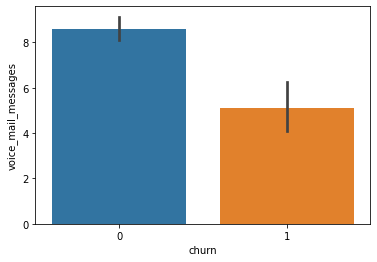

In [15]:
sns.barplot(df.churn, df.voice_mail_messages)

#### Churn customers have less number of voice_mail_messages

In [16]:
df[(df.voice_mail_messages > 0) & (df.churn == 1)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
41,135,1,41,173.1,203.9,122.2,14.6,0,1,85,29.43,107,17.33,78,5.50,15,3.94,56.20,1
57,121,1,30,198.4,75.3,181.2,5.8,3,0,129,33.73,77,6.40,77,8.15,3,1.57,49.85,1
115,36,1,42,196.8,254.9,138.3,20.0,0,1,89,33.46,122,21.67,126,6.22,6,5.40,66.75,1
127,61,1,27,187.5,146.6,225.7,6.4,4,0,124,31.88,103,12.46,129,10.16,6,1.73,56.23,1
198,131,1,26,292.9,199.7,255.3,13.8,4,1,101,49.79,97,16.97,127,11.49,7,3.73,81.98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,103,1,35,110.5,208.3,87.4,13.9,4,0,101,18.79,81,17.71,77,3.93,2,3.75,44.18,1
3209,68,1,24,125.7,275.9,214.5,14.2,3,1,92,21.37,98,23.45,108,9.65,6,3.83,58.30,1
3246,77,1,44,103.2,236.3,203.5,11.9,0,1,117,17.54,86,20.09,101,9.16,2,3.21,50.00,1
3287,170,1,42,199.5,135.0,184.6,10.9,4,0,119,33.92,90,11.48,49,8.31,3,2.94,56.65,1


<AxesSubplot:xlabel='international_plan', ylabel='count'>

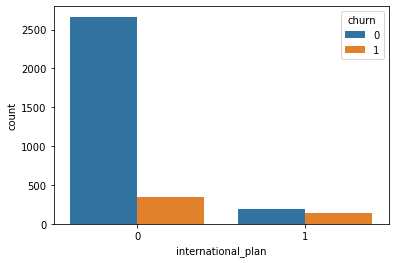

In [17]:
sns.countplot(df.international_plan, hue='churn', data=df)

#### Those who have no international plan are high churners

In [18]:
df[(df.international_plan== 0) & (df.international_calls!=0) ]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
6,121,1,24,218.2,348.5,212.6,7.5,3,0,88,37.09,108,29.62,118,9.57,7,2.03,78.31,0
8,117,0,0,184.5,351.6,215.8,8.7,1,0,97,31.37,80,29.89,90,9.71,4,2.35,73.32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,79,0,0,134.7,189.7,221.4,11.8,2,0,98,22.90,68,16.12,128,9.96,5,3.19,52.17,0
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0


#### There are 2992 customers with no international plan but have international calls

In [19]:
df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [20]:
df[(df.international_plan== 0) & (df.international_calls!=0) & (df.churn == 1 ) ]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
10,65,0,0,129.1,228.5,208.8,12.7,4,0,137,21.95,83,19.42,111,9.40,6,3.43,54.20,1
15,161,0,0,332.9,317.8,160.6,5.4,4,0,67,56.59,97,27.01,128,7.23,9,1.46,92.29,1
21,77,0,0,62.4,169.9,209.6,5.7,5,0,89,10.61,121,14.44,64,9.43,6,1.54,36.02,1
33,12,0,0,249.6,252.4,280.2,11.8,1,0,118,42.43,119,21.45,90,12.61,3,3.19,79.68,1
48,119,0,0,159.1,231.3,143.2,8.8,5,0,114,27.05,117,19.66,91,6.44,3,2.38,55.53,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,76,0,0,107.3,238.2,271.8,10.0,4,0,140,18.24,133,20.25,116,12.23,3,2.70,53.42,1
3287,170,1,42,199.5,135.0,184.6,10.9,4,0,119,33.92,90,11.48,49,8.31,3,2.94,56.65,1
3301,84,0,0,280.0,202.2,156.8,10.4,0,0,113,47.60,90,17.19,103,7.06,4,2.81,74.66,1
3322,62,0,0,321.1,265.5,180.5,11.5,4,0,105,54.59,122,22.57,72,8.12,2,3.11,88.39,1


#### Out of 483 churn customers 346 have no international_plan but have international calls

In [21]:
# creating new feature domestic charge = day + evening + night charge
df_domestic = df.copy()
df_domestic['domestic_charge'] = df_domestic['day_charge']+df_domestic['evening_charge']+df_domestic['night_charge']
df_domestic.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,domestic_charge
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0,72.86
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0,55.54
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0,59.00
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0,65.02
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0,49.36


<AxesSubplot:xlabel='domestic_charge', ylabel='total_charge'>

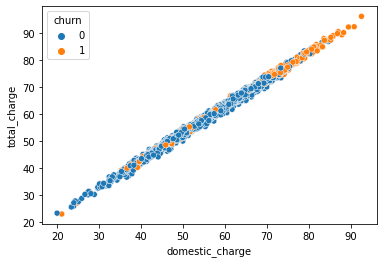

In [22]:
sns.scatterplot(df_domestic.domestic_charge, df_domestic.total_charge, hue=df_domestic.churn)

#### Inferences

1. Domestic charge has positive linear relationship with the total charge
2. Customers having high domestic charge (total charge) are mostly churning
3. Only few customers with less total charge have churned

<AxesSubplot:xlabel='international_charge', ylabel='total_charge'>

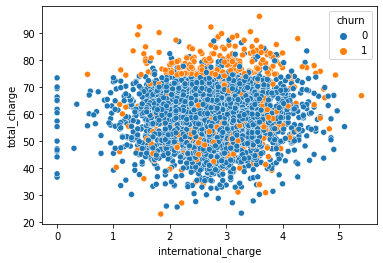

In [23]:
sns.scatterplot(df_domestic.international_charge, df_domestic.total_charge, hue=df_domestic.churn)

<AxesSubplot:xlabel='churn', ylabel='international_charge'>

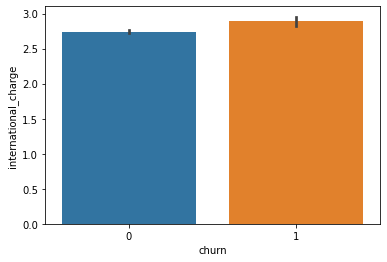

In [24]:
sns.barplot(df_domestic.churn, df_domestic.international_charge)

#### Inferences
1. International charge is not linearly related to total charge 
2. International charge is not affecting the churning rate as it is approximately same for both churn and non-churn customers

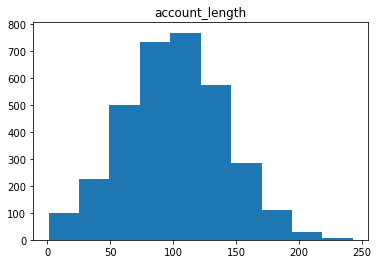

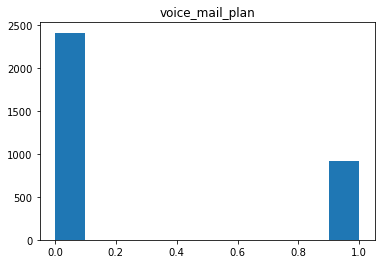

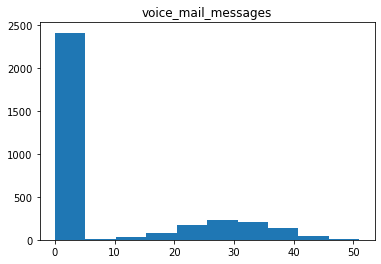

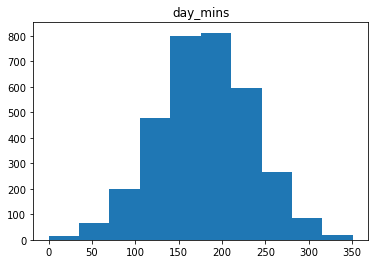

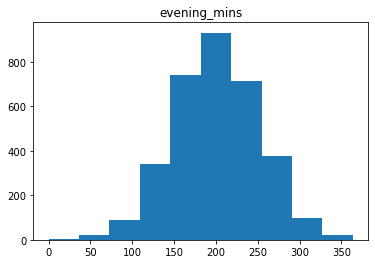

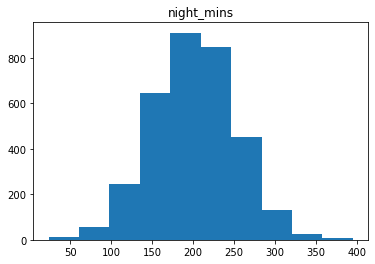

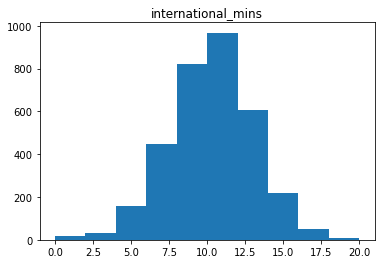

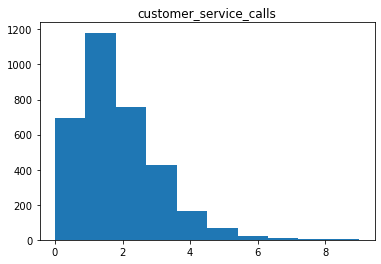

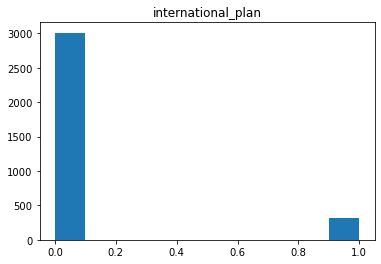

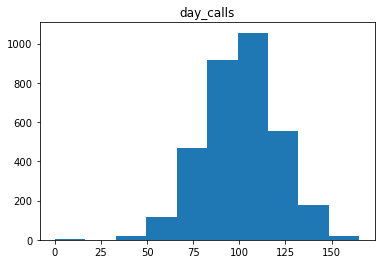

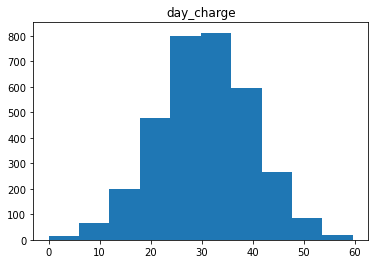

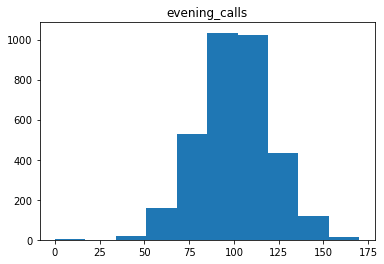

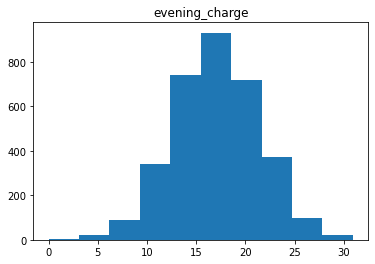

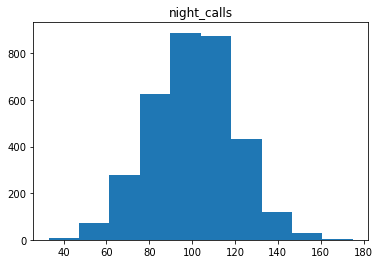

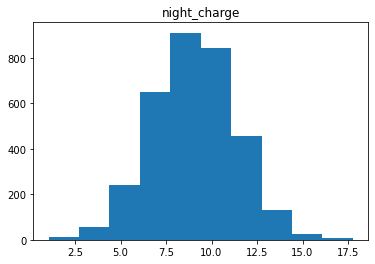

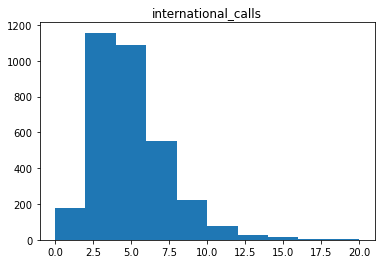

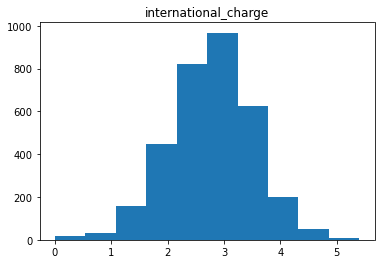

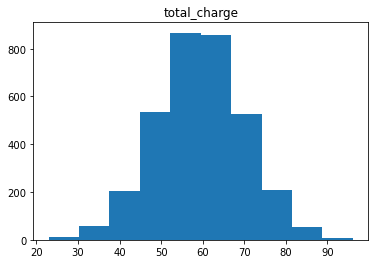

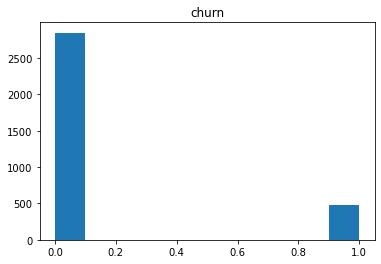

In [25]:
for i in df.columns:
    plt.title(i)
    plt.hist(df[i])
    plt.show()

# Outliers Detection

1. Plotted outliers for all features using boxplot
2. If outliers were very high in number then used z-scores also to plot outliers
3. Then took the intersection (common) of both boxplot and z-scores to get outliers
4. Checked outliers for each columns.
5. Decided to keep the outliers as it was not confirmed whether they were measurement or data entry errors.
6. Also deleting or changing outliers to their 10th or 90th percentile may lead to loss of information so, decided to not change the outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x18d38167310>,
 'caps': [<matplotlib.lines.Line2D at 0x18d38167970>,
 'boxes': [<matplotlib.lines.Line2D at 0x18d38159e80>,
 'medians': [<matplotlib.lines.Line2D at 0x18d381790d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x18d38179460>,
 'means': []}

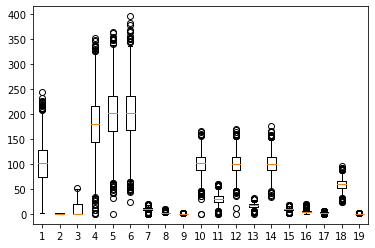

In [26]:
plt.boxplot(df)

In [27]:
def calculate_zscores(col_name):
    UL = np.round(df[col_name].mean() + 3*(df[col_name].std()),3)
    LL = np.round(df[col_name].mean() - 3*(df[col_name].std()),3)
    return (LL,UL)

def calculate_outliers_boxplot(colName):
    q1,q3 = np.percentile(df[colName],[25,75])
    iqr = q3-q1
    LB = np.round(q1 - 1.5*(iqr),3)
    UB = np.round(q3 + 1.5*(iqr),3)
    return (LB,UB)

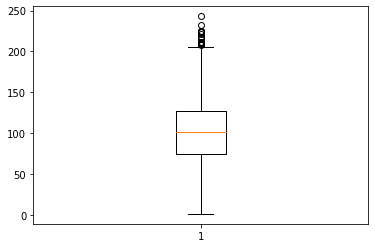

In [28]:
r_account_length = plt.boxplot(df['account_length'])

In [29]:
outlier_points_al = r_account_length["fliers"][0].get_data()[1]
outlier_al = outlier_points_al.tolist()
print(len(outlier_al))
sorted(outlier_al)

18


[208,
 209,
 209,
 209,
 210,
 210,
 212,
 212,
 215,
 217,
 217,
 221,
 224,
 224,
 225,
 225,
 232,
 243]

In [30]:
# checking outliers for upper bound
df[df['account_length'] > 224].sort_values(by='account_length')

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
1551,225,0,0,165.4,273.7,210.0,8.7,0,0,106,28.12,109,23.26,93,9.45,3,2.35,63.18,1
1751,225,0,0,182.7,246.5,218.0,8.8,1,0,142,31.06,63,20.95,103,9.81,2,2.38,64.20,0
1408,232,0,0,165.6,195.9,118.3,11.8,1,0,104,28.15,115,16.65,77,5.32,3,3.19,53.31,0
817,243,0,0,95.5,163.7,264.2,6.6,2,0,92,16.24,63,13.91,118,11.89,6,1.78,43.82,0


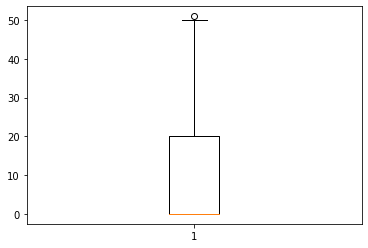

In [31]:
r_account_length = plt.boxplot(df['voice_mail_messages'])

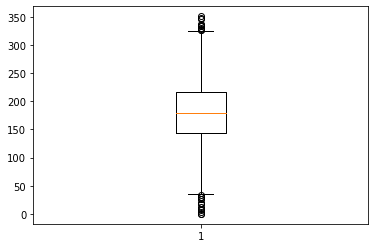

In [32]:
r_day_mins = plt.boxplot(df['day_mins'])

In [33]:
outlier_points_dm = r_day_mins["fliers"][0].get_data()[1]
outlier_dm = outlier_points_dm.tolist()
print(len(outlier_dm))
sorted(outlier_dm)

25


[0.0,
 0.0,
 2.6,
 7.8,
 7.9,
 12.5,
 17.6,
 18.9,
 19.5,
 25.9,
 27.0,
 29.9,
 30.9,
 34.0,
 326.3,
 326.5,
 328.1,
 329.8,
 332.9,
 334.3,
 335.5,
 337.4,
 345.3,
 346.8,
 350.8]

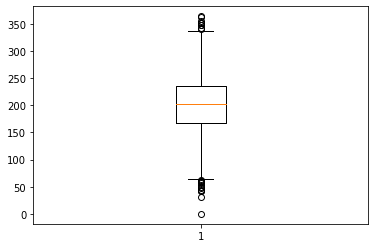

In [34]:
r_evening_mins = plt.boxplot(df['evening_mins'])

In [35]:
outlier_evening_mins = r_evening_mins["fliers"][0].get_data()[1]
outlier_em = outlier_evening_mins.tolist()
print(len(outlier_em))
sorted(outlier_em)

24


[0.0,
 31.2,
 42.2,
 42.5,
 43.9,
 48.1,
 49.2,
 52.9,
 56.0,
 58.6,
 58.9,
 60.0,
 60.8,
 61.9,
 339.9,
 341.3,
 347.3,
 348.5,
 350.5,
 350.9,
 351.6,
 354.2,
 361.8,
 363.7]

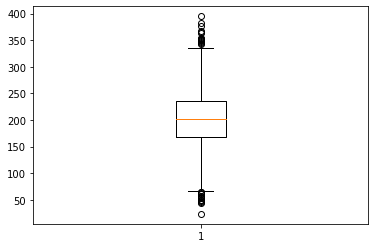

In [36]:
r_night_mins = plt.boxplot(df['night_mins'])

In [37]:
outlier_points_nm = r_night_mins["fliers"][0].get_data()[1]
outlier_nm = outlier_points_nm.tolist()
print(len(outlier_nm))
sorted(outlier_nm)

30


[23.2,
 43.7,
 45.0,
 47.4,
 50.1,
 50.1,
 53.3,
 54.0,
 54.5,
 56.6,
 57.5,
 61.4,
 63.3,
 63.6,
 64.2,
 342.8,
 344.3,
 345.8,
 349.2,
 349.7,
 350.2,
 352.2,
 352.5,
 354.9,
 364.3,
 364.9,
 367.7,
 377.5,
 381.9,
 395.0]

In [38]:
# checking outliers for lower bound
# here 23.2 is an outlier but no of evening calls is also less
# data appears to be accurate
df[df['night_mins'] < 47].sort_values(by='night_mins').iloc[:,5:]

,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
1260,23.2,9.5,3,0,107,27.22,136,14.34,102,1.04,4,2.57,45.17,0
1113,43.7,10.6,1,0,98,35.07,82,24.89,121,1.97,4,2.86,64.79,0
883,45.0,8.0,1,0,84,24.87,113,21.75,117,2.03,12,2.16,50.81,0


In [39]:
# checking outliers for upper bound
df[df['night_mins'] >364].sort_values(by='night_mins').iloc[:,5:]

,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
922,364.3,9.3,1,0,121,40.78,51,12.10,106,16.39,5,2.51,71.78,0
3107,364.9,9.1,1,0,92,26.79,87,16.86,106,16.42,4,2.46,62.53,0
2321,367.7,15.5,1,0,56,26.28,84,22.36,89,16.55,2,4.19,69.38,0
1445,377.5,9.7,1,0,104,37.83,94,14.58,114,16.99,2,2.62,72.02,0
1317,381.9,7.5,2,0,80,27.80,136,23.36,147,17.19,5,2.03,70.38,0
2663,395.0,12.7,2,0,123,28.87,94,15.56,72,17.77,7,3.43,65.63,0


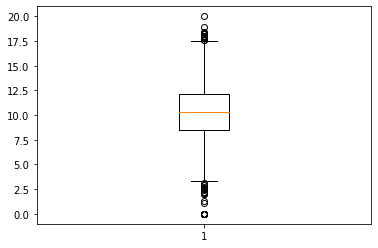

In [40]:
r_international_mins = plt.boxplot(df['international_mins'])

In [41]:
outlier_points_im = r_international_mins["fliers"][0].get_data()[1]
outlier_im = outlier_points_im.tolist()
print(len(outlier_im))
sorted(outlier_im)

46


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.1,
 1.3,
 2.0,
 2.0,
 2.1,
 2.1,
 2.2,
 2.4,
 2.5,
 2.6,
 2.7,
 2.9,
 2.9,
 3.1,
 17.6,
 17.6,
 17.8,
 17.8,
 17.9,
 18.0,
 18.0,
 18.0,
 18.2,
 18.2,
 18.3,
 18.4,
 18.9,
 20.0]

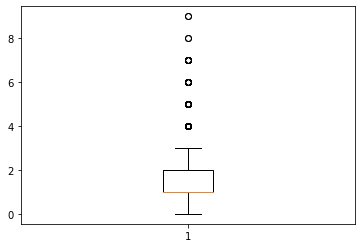

In [42]:
r_customer_service_calls = plt.boxplot(df['customer_service_calls'])

In [43]:
outlier_points_csc = r_customer_service_calls["fliers"][0].get_data()[1]
outlier_csc = outlier_points_csc.tolist()
print(len(outlier_csc))
sorted(outlier_csc)

267


[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,


In [44]:
# this will give dataframe which will be easier to merge with the z-scores dataframe
LB, UB = calculate_outliers_boxplot('customer_service_calls')
print(LB,UB)
outlier_wrt_boxplot_csc = df[(df['customer_service_calls']> UB) | (df['customer_service_calls']< LB )]
print(outlier_wrt_boxplot_csc.shape)
outlier_wrt_boxplot_csc

-0.5 3.5
(267, 19)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
10,65,0,0,129.1,228.5,208.8,12.7,4,0,137,21.95,83,19.42,111,9.40,6,3.43,54.20,1
14,62,0,0,120.7,307.2,203.0,13.1,4,0,70,20.52,76,26.11,99,9.14,6,3.54,59.31,0
15,161,0,0,332.9,317.8,160.6,5.4,4,0,67,56.59,97,27.01,128,7.23,9,1.46,92.29,1
21,77,0,0,62.4,169.9,209.6,5.7,5,0,89,10.61,121,14.44,64,9.43,6,1.54,36.02,1
48,119,0,0,159.1,231.3,143.2,8.8,5,0,114,27.05,117,19.66,91,6.44,3,2.38,55.53,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,172,0,0,203.9,234.0,160.7,17.8,4,0,109,34.66,123,19.89,65,7.23,4,4.81,66.59,0
3309,100,0,0,219.4,225.7,255.3,12.0,4,1,112,37.30,102,19.18,95,11.49,4,3.24,71.21,0
3320,122,0,0,140.0,196.4,120.1,9.7,4,1,101,23.80,77,16.69,133,5.40,4,2.62,48.51,1
3322,62,0,0,321.1,265.5,180.5,11.5,4,0,105,54.59,122,22.57,72,8.12,2,3.11,88.39,1


In [45]:
# we were getting lot of outliers using boxplot so using z-scores for outliers
LL,UL = calculate_zscores('customer_service_calls')
print(LL, UL)
outlier_wrt_std_dev_csc = df[(df['customer_service_calls']> UL) | (df['customer_service_calls']< LL )]
print(outlier_wrt_std_dev_csc.shape)
outlier_wrt_std_dev_csc

-2.384 5.509
(35, 19)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
332,86,0,0,128.3,197.1,138.4,12.2,7,0,121,21.81,93,16.75,152,6.23,5,3.29,48.08,1
522,122,1,27,253.7,229.2,190.5,9.2,7,0,84,43.13,109,19.48,123,8.57,5,2.48,73.66,0
542,152,1,20,237.5,253.4,265.2,14.2,9,1,120,40.38,94,21.54,80,11.93,3,3.83,77.68,1
694,165,0,0,154.2,268.6,188.8,10.9,6,0,91,26.21,108,22.83,99,8.50,4,2.94,60.48,0
721,103,1,36,87.2,169.3,166.7,10.9,6,0,92,14.82,110,14.39,80,7.50,5,2.94,39.65,1
778,115,1,26,170.5,217.2,225.7,13.6,6,0,107,28.99,77,18.46,71,10.16,5,3.67,61.28,0
902,149,0,0,166.6,218.8,208.3,8.2,7,0,61,28.32,107,18.60,131,9.37,6,2.21,58.50,0
908,23,0,0,190.2,166.4,219.8,15.0,6,0,89,32.33,108,14.14,73,9.89,4,4.05,60.41,0
974,21,1,31,135.9,271.0,179.1,9.5,6,0,90,23.10,84,23.04,89,8.06,7,2.57,56.77,0
1142,105,0,0,106.4,240.1,147.7,5.3,6,0,71,18.09,83,20.41,114,6.65,4,1.43,46.58,1


In [46]:
# merging zscores and boxplot outliers
outlier_merged_csc = pd.merge(outlier_wrt_boxplot_csc, outlier_wrt_std_dev_csc, left_index=True, right_index=True)
print(outlier_merged_csc.shape)
outlier_merged_csc.iloc[:,7:19].sort_values(by='customer_service_calls_x')

(35, 38)


,customer_service_calls_x,international_plan_x,day_calls_x,day_charge_x,evening_calls_x,evening_charge_x,night_calls_x,night_charge_x,international_calls_x,international_charge_x,total_charge_x,churn_x
3190,6,0,151,29.70,56,12.58,109,7.57,3,4.27,54.12,1
2327,6,0,77,28.41,79,11.20,98,8.43,1,2.54,50.58,1
2223,6,0,108,34.80,105,12.16,84,7.46,4,2.97,57.39,0
1919,6,0,94,12.04,102,18.33,125,10.39,1,2.57,43.33,1
2553,6,0,107,44.27,104,17.70,115,9.36,2,2.70,74.03,0
2786,6,0,90,18.90,98,22.40,128,10.11,6,2.43,53.84,1
2958,6,0,115,21.86,88,18.38,96,11.49,2,1.70,53.43,1
1638,6,0,79,27.10,88,15.26,71,7.55,2,2.62,52.53,1
2961,6,0,81,28.56,125,13.87,120,7.77,2,2.16,52.36,1
1407,6,0,105,13.99,91,21.77,98,10.33,2,3.19,49.28,1


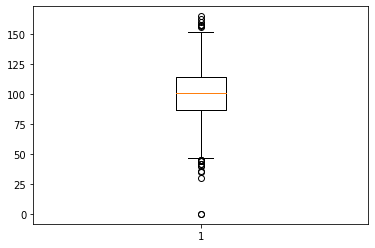

In [47]:
r_day_calls = plt.boxplot(df['day_calls'])

In [48]:
outlier_points_dc = r_day_calls["fliers"][0].get_data()[1]
outlier_dc = outlier_points_dc.tolist()
print(len(outlier_dc))
sorted(outlier_dc)

23


[0,
 0,
 30,
 35,
 36,
 40,
 40,
 42,
 42,
 44,
 44,
 44,
 45,
 45,
 45,
 156,
 157,
 158,
 158,
 158,
 160,
 163,
 165]

In [49]:
# checking for lower bound outliers
df[df['day_calls'] < 40].sort_values(by='day_calls').iloc[:,9:]

,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
1345,0,0.00,130,13.57,88,7.52,1,1.84,22.93,1
1397,0,0.00,119,16.33,95,7.60,4,1.94,25.87,0
1144,30,36.84,125,12.27,106,6.09,1,2.92,58.12,0
1989,35,24.57,101,22.30,82,10.19,7,3.24,60.30,0
692,36,31.59,134,23.50,104,8.64,7,1.54,65.27,0


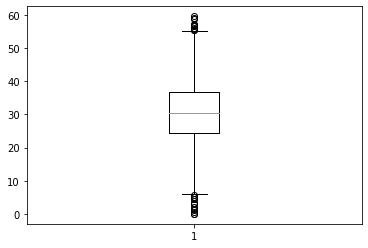

In [50]:
r_day_charge = plt.boxplot(df['day_charge'])

In [51]:
outlier_points_dc = r_day_charge["fliers"][0].get_data()[1]
outlier_dc = outlier_points_dc.tolist()
print(len(outlier_dc))
sorted(outlier_dc)

25


[0.0,
 0.0,
 0.44,
 1.33,
 1.34,
 2.13,
 2.99,
 3.21,
 3.32,
 4.4,
 4.59,
 5.08,
 5.25,
 5.78,
 55.47,
 55.51,
 55.78,
 56.07,
 56.59,
 56.83,
 57.04,
 57.36,
 58.7,
 58.96,
 59.64]

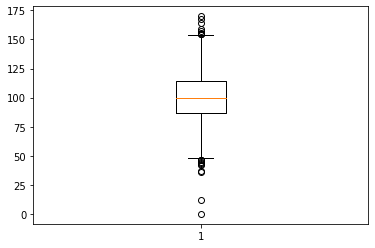

In [52]:
r_evening_calls = plt.boxplot(df['evening_calls'])

In [53]:
outlier_points_ec = r_evening_calls["fliers"][0].get_data()[1]
outlier_ec = outlier_points_ec.tolist()
print(len(outlier_ec))
sorted(outlier_ec)

20


[0,
 12,
 36,
 37,
 42,
 43,
 44,
 45,
 46,
 46,
 46,
 155,
 155,
 155,
 156,
 157,
 159,
 164,
 168,
 170]

In [54]:
df[df['evening_calls'] < 42].sort_values(by='evening_calls').iloc[:,11:]

,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
2932,0,0.00,94,7.89,6,3.19,46.64,0
960,12,15.92,85,9.63,3,3.59,63.00,0
1615,36,18.11,77,12.62,3,2.05,59.49,0
646,37,19.37,103,7.66,9,4.16,71.24,0


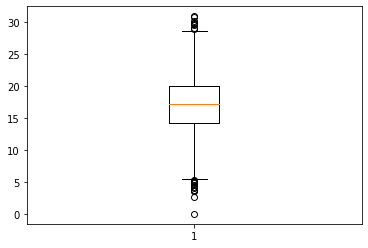

In [55]:
r_evening_charge = plt.boxplot(df['evening_charge'])

In [56]:
outlier_points_echarge = r_evening_charge["fliers"][0].get_data()[1]
outlier_echarge = outlier_points_echarge.tolist()
print(len(outlier_echarge))
sorted(outlier_echarge)

24


[0.0,
 2.65,
 3.59,
 3.61,
 3.73,
 4.09,
 4.18,
 4.5,
 4.76,
 4.98,
 5.01,
 5.1,
 5.17,
 5.26,
 28.89,
 29.01,
 29.52,
 29.62,
 29.79,
 29.83,
 29.89,
 30.11,
 30.75,
 30.91]

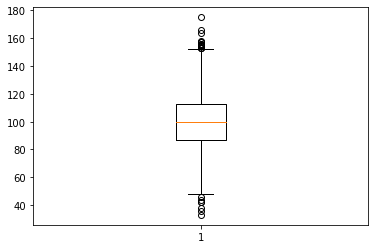

In [57]:
r_night_calls = plt.boxplot(df['night_calls'])

In [58]:
outlier_points_nc = r_night_calls["fliers"][0].get_data()[1]
outlier_nc = outlier_points_nc.tolist()
print(len(outlier_nc))
sorted(outlier_nc)

22


[33,
 36,
 38,
 42,
 42,
 44,
 46,
 153,
 153,
 153,
 154,
 154,
 155,
 155,
 156,
 156,
 157,
 157,
 158,
 164,
 166,
 175]

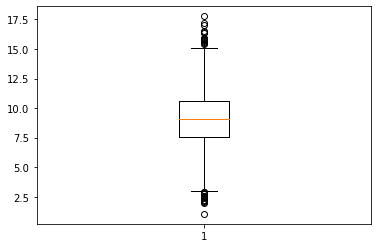

In [59]:
r_night_charge = plt.boxplot(df['night_charge'])

In [60]:
outlier_points_ncharge = r_night_charge["fliers"][0].get_data()[1]
outlier_ncharge = outlier_points_ncharge.tolist()
print(len(outlier_ncharge))
sorted(outlier_ncharge)

30


[1.04,
 1.97,
 2.03,
 2.13,
 2.25,
 2.25,
 2.4,
 2.43,
 2.45,
 2.55,
 2.59,
 2.76,
 2.85,
 2.86,
 2.89,
 15.43,
 15.49,
 15.56,
 15.71,
 15.74,
 15.76,
 15.85,
 15.86,
 15.97,
 16.39,
 16.42,
 16.55,
 16.99,
 17.19,
 17.77]

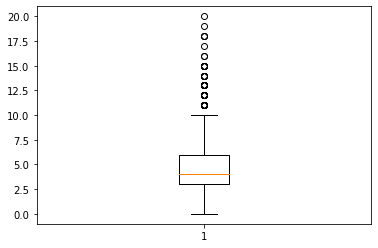

In [61]:
r_international_calls = plt.boxplot(df['international_calls'])

In [62]:
outlier_points_icalls = r_international_calls["fliers"][0].get_data()[1]
outlier_icalls = outlier_points_icalls.tolist()
print(len(outlier_icalls))
sorted(outlier_icalls)

78


[11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 17,
 18,
 18,
 18,
 19,
 20]

In [63]:
# using boxplot
LB, UB = calculate_outliers_boxplot('international_calls')
print(LB,UB)
outlier_wrt_boxplot_ic_UB = df[df['international_calls']> UB]
print(outlier_wrt_boxplot_ic_UB.shape)
outlier_wrt_boxplot_ic_UB.head()

-1.5 10.5
(78, 19)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
22,130,0,0,183.0,72.9,181.8,9.5,0,0,112,31.11,99,6.20,78,8.18,19,2.57,48.06,0
41,135,1,41,173.1,203.9,122.2,14.6,0,1,85,29.43,107,17.33,78,5.50,15,3.94,56.20,1
153,56,0,0,226.0,248.5,140.5,6.9,1,0,112,38.42,118,21.12,142,6.32,11,1.86,67.72,0
182,67,1,36,115.6,237.7,169.9,9.9,2,0,111,19.65,94,20.20,103,7.65,12,2.67,50.17,0
185,73,0,0,214.3,268.5,241.2,10.8,1,0,145,36.43,135,22.82,92,10.85,13,2.92,73.02,0


In [64]:
# using z-scores
LL,UL = calculate_zscores('international_calls')
print(LL, UL)
outlier_wrt_std_dev_ic_UL = df[df['international_calls']> UL ]
print(outlier_wrt_std_dev_ic_UL.shape)
outlier_wrt_std_dev_ic_UL.head(5)

-2.904 11.863
(50, 19)


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
22,130,0,0,183.0,72.9,181.8,9.5,0,0,112,31.11,99,6.20,78,8.18,19,2.57,48.06,0
41,135,1,41,173.1,203.9,122.2,14.6,0,1,85,29.43,107,17.33,78,5.50,15,3.94,56.20,1
182,67,1,36,115.6,237.7,169.9,9.9,2,0,111,19.65,94,20.20,103,7.65,12,2.67,50.17,0
185,73,0,0,214.3,268.5,241.2,10.8,1,0,145,36.43,135,22.82,92,10.85,13,2.92,73.02,0
219,106,0,0,223.0,110.1,188.7,7.1,0,0,121,37.91,98,9.36,107,8.49,12,1.92,57.68,0


In [65]:
# merging outlier code for zscores and boxplot
outlier_ic_UB = pd.merge(outlier_wrt_boxplot_ic_UB, outlier_wrt_std_dev_ic_UL, left_index=True, right_index=True)
print(outlier_ic_UB.shape)
outlier_ic_UB.iloc[:,12:19].sort_values(by='international_calls_x')

(50, 38)


,evening_charge_x,night_calls_x,night_charge_x,international_calls_x,international_charge_x,total_charge_x,churn_x
3025,6.80,82,5.44,12,4.21,50.04,0
1021,14.25,71,4.96,12,2.27,50.01,0
1333,14.09,105,11.12,12,2.92,65.77,0
1419,12.05,105,8.12,12,1.78,39.92,0
2212,14.53,130,7.98,12,1.30,65.10,0
514,18.34,82,4.86,12,3.78,72.18,1
883,21.75,117,2.03,12,2.16,50.81,0
474,19.98,132,7.33,12,4.00,67.79,0
504,13.17,82,11.86,12,3.35,63.45,0
329,20.45,108,3.59,12,3.89,62.81,0


# Feature Engineering

## Feature Importance - Correlation Matrix / Mutual Information Gain / Anova Test

### Correlation Matrix

<AxesSubplot:>

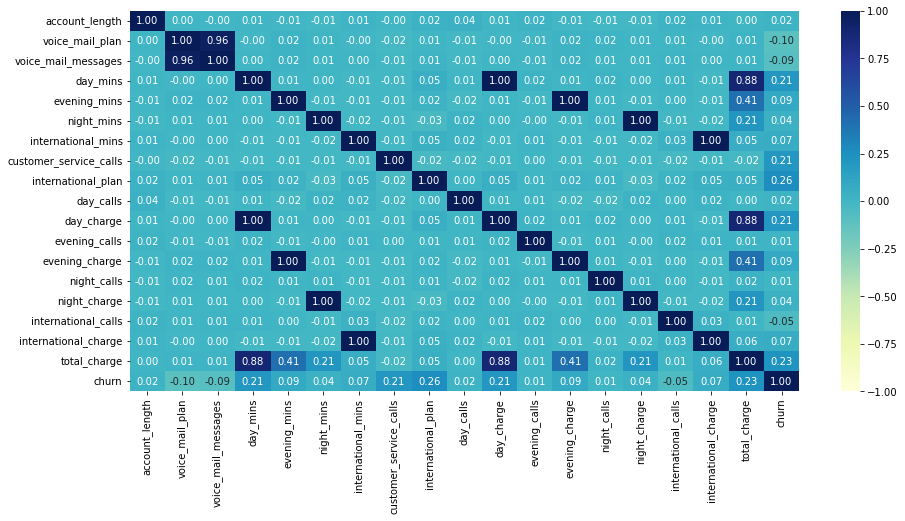

In [66]:
corr = df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, cmap="YlGnBu", vmax=1, vmin=-1, fmt='.2f')

#### Inferences - Correlation

1. "International_plan", total_charge, 'customer_service_call' -- important features

### Mutual Information Gain

In [67]:
x= df.iloc[:,0:18]
x.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09


In [68]:
y= df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [69]:
importances = mutual_info_classif(x,y)
importances

array([1.94414207e-03, 5.30621122e-03, 1.46798120e-02, 5.48085599e-02,
       0.00000000e+00, 6.85592925e-04, 5.70560415e-03, 2.76125092e-02,
       3.14774459e-02, 0.00000000e+00, 5.22005015e-02, 1.74732613e-05,
       0.00000000e+00, 0.00000000e+00, 2.02390199e-03, 2.37970117e-03,
       1.12102846e-02, 1.04960125e-01])

In [71]:
importance_list = pd.Series(importances)
feature_name_list = df.columns
#print(feature_name_list)

In [72]:
df_feature_importance = pd.DataFrame()
df_feature_importance['Feature'] = feature_name_list
df_feature_importance['IG'] = importance_list
df_feature_importance.sort_values(by='IG', ascending=False)

,Feature,IG
17,total_charge,0.104960
3,day_mins,0.054809
10,day_charge,0.052201
8,international_plan,0.031477
7,customer_service_calls,0.027613
2,voice_mail_messages,0.014680
16,international_charge,0.011210
6,international_mins,0.005706
1,voice_mail_plan,0.005306
15,international_calls,0.002380


<AxesSubplot:xlabel='IG', ylabel='Feature'>

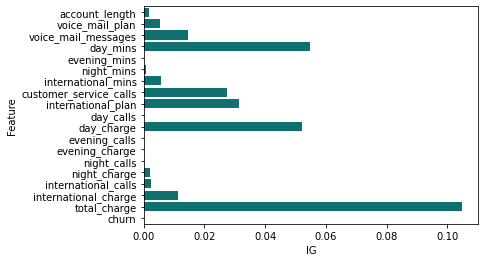

In [73]:
sns.barplot(x='IG', y='Feature', data=df_feature_importance, color='teal')

#### Inferences - Information Gain

1. 'total_charge', 'customer_service_calls', 'international_plan' -- important features
2. 'day_mins' & 'day_charge' == drop due to multicollinearity

3. 'total_charge','customer_service_calls', 'international_plan', 'international_charge' -- final important features

### Anova Test

In [74]:
x = df.iloc[:,0:18]
print(x.shape)
y = df['churn']
print(y.shape)

(3333, 18)
(3333,)


In [75]:
# define feature selection
fs = SelectKBest(score_func=f_classif, k=18)
x_selected = fs.fit(x,y)

In [76]:
print("P values")
np.round(x_selected.pvalues_,3)

P values


array([0.34 , 0.   , 0.   , 0.   , 0.   , 0.04 , 0.   , 0.   , 0.   ,
       0.287, 0.   , 0.594, 0.   , 0.723, 0.04 , 0.002, 0.   , 0.   ])

In [77]:
print('f1 scores')
np.round(x_selected.scores_,3)

f1 scores


array([9.12000e-01, 3.51230e+01, 2.70360e+01, 1.46351e+02, 2.89330e+01,
       4.20100e+00, 1.55830e+01, 1.51767e+02, 2.41206e+02, 1.13500e+00,
       1.46351e+02, 2.84000e-01, 2.89260e+01, 1.26000e-01, 4.20200e+00,
       9.32800e+00, 1.55930e+01, 1.88708e+02])

In [78]:
def list_ceil(x):
    return [math.ceil(i) for i in x]        

In [79]:
list_ceil(x_selected.scores_)

[1, 36, 28, 147, 29, 5, 16, 152, 242, 2, 147, 1, 29, 1, 5, 10, 16, 189]

In [80]:
#creating dataframe of f1scores & pvalues
df_anova = pd.DataFrame()
list_pvalues = pd.Series(np.round(x_selected.pvalues_,3))
list_fscores = list_ceil(x_selected.scores_)
list_cols    = x.columns
df_anova['Features'] = list_cols
df_anova['F scores'] = list_fscores
df_anova['Pvalues']  = list_pvalues
df_anova.sort_values(by='F scores', ascending=False)

,Features,F scores,Pvalues
8,international_plan,242,0.000
17,total_charge,189,0.000
7,customer_service_calls,152,0.000
3,day_mins,147,0.000
10,day_charge,147,0.000
1,voice_mail_plan,36,0.000
4,evening_mins,29,0.000
12,evening_charge,29,0.000
2,voice_mail_messages,28,0.000
6,international_mins,16,0.000


<AxesSubplot:xlabel='F scores', ylabel='Features'>

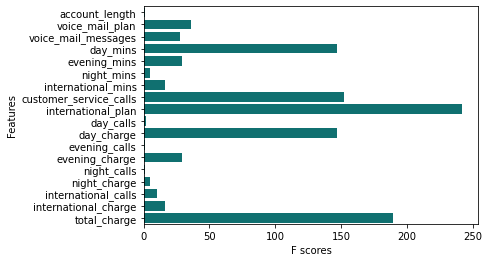

In [81]:
sns.barplot(x='F scores', y='Features', data=df_anova, color='teal')

#### Inferences - Anova Test

1. 'international_plan','total_charge', 'customer_service_calls' -- important features

## Transformations

Skewness =  1.321


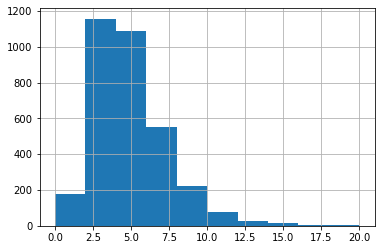

In [82]:
df.international_calls.hist()
print("Skewness = ",np.round(df.international_calls.skew(),3))

Skewness =  1.091


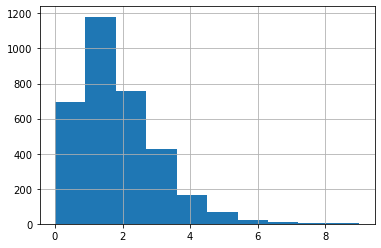

In [83]:
df.customer_service_calls.hist()
print("Skewness = ",np.round(df.customer_service_calls.skew(),3))

Skewness =  1.2648236337102594


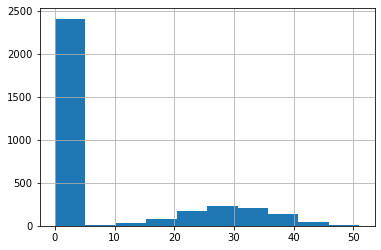

In [84]:
df.voice_mail_messages.hist()
print('Skewness = ',df.voice_mail_messages.skew())


1. For the above 3 features the skewness is high i.e. above 1
2. We will not do any log or sqrt transformation as these are discrete variables 
3. Transformations are required only for continuous variables and continuous variables are all normally distributed.

# Multicollinearity - Variance Inflation Factor (VIF)

In [5]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif)

In [6]:
X  = df.iloc[:,:-1]
print(X.shape)
y = df[['churn']]
print(y.shape)

(3333, 18)
(3333, 1)


<AxesSubplot:>

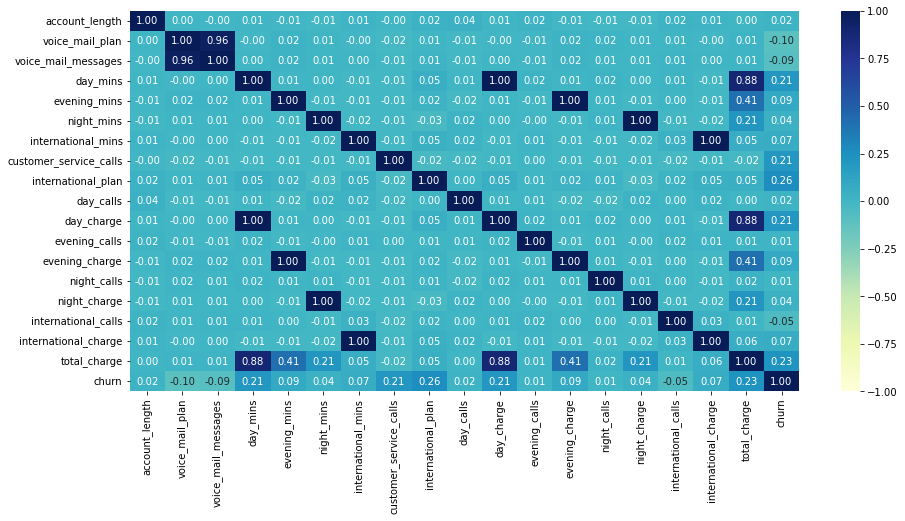

In [7]:
corr = df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, cmap="YlGnBu", vmax=1, vmin=-1, fmt='.2f')

In [8]:
df_vif = calc_vif(X)
df_vif.sort_values(by='VIF', ascending=False)

,variables,VIF
17,total_charge,inf
16,international_charge,inf
14,night_charge,inf
12,evening_charge,inf
10,day_charge,inf
3,day_mins,1.246201e+08
4,evening_mins,3.738593e+07
5,night_mins,1.071873e+07
6,international_mins,9.980961e+05
13,night_calls,2.227654e+01


In [9]:
#deleted these variables as they are 100% related(from corelation matrix) to international_mins, night_mins,evening_mins,day_mins respectively
df.drop(labels=['international_charge','night_charge','evening_charge','day_charge'], axis=1, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,evening_calls,night_calls,international_calls,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,99,91,3,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,103,103,3,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,110,104,5,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,88,89,7,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,122,121,3,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,126,83,6,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,55,123,4,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,58,91,6,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,84,137,10,57.53,0


In [10]:
# again plotting vif for remaining 15 features
X_vif_1  = df.iloc[:,:-1]
print(X_vif_1.shape)

df_vif_1 = calc_vif(X_vif_1)
df_vif_1.sort_values(by='VIF', ascending=False)

(3333, 14)


,variables,VIF
13,total_charge,1.131036e+08
3,day_mins,3.164567e+07
4,evening_mins,9.633552e+06
5,night_mins,2.696537e+06
6,international_mins,2.546851e+05
11,night_calls,2.226289e+01
10,evening_calls,2.196817e+01
9,day_calls,2.176489e+01
1,voice_mail_plan,1.645019e+01
2,voice_mail_messages,1.606177e+01


In [11]:
#deleting day_mins as it has 88% correlation with total charge
df.drop(labels=['day_mins'], axis=1, inplace=True)
df

,account_length,voice_mail_plan,voice_mail_messages,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,evening_calls,night_calls,international_calls,total_charge,churn
0,128,1,25,197.4,244.7,10.0,1,0,110,99,91,3,75.56,0
1,107,1,26,195.5,254.4,13.7,1,0,123,103,103,3,59.24,0
2,137,0,0,121.2,162.6,12.2,0,0,114,110,104,5,62.29,0
3,84,0,0,61.9,196.9,6.6,2,1,71,88,89,7,66.80,0
4,75,0,0,148.3,186.9,10.1,3,1,113,122,121,3,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,215.5,279.1,9.9,2,0,77,126,83,6,60.10,0
3329,68,0,0,153.4,191.3,9.6,3,0,57,55,123,4,63.53,0
3330,28,0,0,288.8,191.9,14.1,2,0,109,58,91,6,67.74,0
3331,184,0,0,159.6,139.2,5.0,2,1,105,84,137,10,57.53,0


In [12]:
X_vif_1  = df.iloc[:,:-1]
print(X_vif_1.shape)

df_vif_2 = calc_vif(X_vif_1)
df_vif_2.sort_values(by='VIF', ascending=False)

(3333, 13)


,variables,VIF
12,total_charge,39.887402
10,night_calls,22.262709
9,evening_calls,21.956251
8,day_calls,21.755188
3,evening_mins,19.592258
4,night_mins,16.676052
1,voice_mail_plan,16.447975
2,voice_mail_messages,16.060220
5,international_mins,13.396959
0,account_length,7.194570


In [13]:
# stopping here
# also deleting more features can cause loss of information
X_vif_1  = df.iloc[:,:-1]
print(X_vif_1.shape)

df_vif_3 = calc_vif(X_vif_1)
df_vif_3.sort_values(by='VIF', ascending=False)

(3333, 13)


,variables,VIF
12,total_charge,39.887402
10,night_calls,22.262709
9,evening_calls,21.956251
8,day_calls,21.755188
3,evening_mins,19.592258
4,night_mins,16.676052
1,voice_mail_plan,16.447975
2,voice_mail_messages,16.060220
5,international_mins,13.396959
0,account_length,7.194570


In [14]:
df

,account_length,voice_mail_plan,voice_mail_messages,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,evening_calls,night_calls,international_calls,total_charge,churn
0,128,1,25,197.4,244.7,10.0,1,0,110,99,91,3,75.56,0
1,107,1,26,195.5,254.4,13.7,1,0,123,103,103,3,59.24,0
2,137,0,0,121.2,162.6,12.2,0,0,114,110,104,5,62.29,0
3,84,0,0,61.9,196.9,6.6,2,1,71,88,89,7,66.80,0
4,75,0,0,148.3,186.9,10.1,3,1,113,122,121,3,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,215.5,279.1,9.9,2,0,77,126,83,6,60.10,0
3329,68,0,0,153.4,191.3,9.6,3,0,57,55,123,4,63.53,0
3330,28,0,0,288.8,191.9,14.1,2,0,109,58,91,6,67.74,0
3331,184,0,0,159.6,139.2,5.0,2,1,105,84,137,10,57.53,0


# Model Training & Evaluation

## Without Scaling

In [76]:
X  = df.iloc[:,:-1]
print(X.shape)
y = df[['churn']]
print(y.shape)

(3333, 13)
(3333, 1)


In [77]:
df_raw = pd.DataFrame(columns=[['Models','Accurancy_tr','Accuracy_ts','F1-score_1']])
tr_acc_list = []
ts_acc_list = []
ts_f1_list  = []

#on raw data
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2666, 13)
(667, 13)
(2666, 1)
(667, 1)


In [78]:
#Logistic Regression
print('\n\nLogistic Regression')
lr_model = LogisticRegression(random_state= 11)
lr_model.fit(x_train,y_train)
y_pred_train_lr = lr_model.predict(x_train)
y_pred_test_lr  = lr_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_lr),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_lr),2))
print(np.round(confusion_matrix(y_test,y_pred_test_lr),2))
print(classification_report(y_test,y_pred_test_lr))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_lr),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_lr),2))

cl_report_lr = classification_report(y_test,y_pred_test_lr, output_dict=True)
tr_acc_list.append(np.round(accuracy_score(y_train, y_pred_train_lr),2)) 
ts_acc_list.append(np.round(accuracy_score(y_test,y_pred_test_lr),2)) 
ts_f1_list.append(np.round(cl_report_lr['1']['f1-score'],2))


# Gaussian NB
print('\n\nGaussian NB')
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
y_pred_train_gnb = gnb_model.predict(x_train)
y_pred_test_gnb  = gnb_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_gnb),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_gnb),2))
print(np.round(confusion_matrix(y_test,y_pred_test_gnb),2))
print(classification_report(y_test,y_pred_test_gnb))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_gnb),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test, y_pred_test_gnb),2))

cl_report_gnb = classification_report(y_test,y_pred_test_gnb, output_dict=True)
tr_acc_list.append(np.round(accuracy_score(y_train, y_pred_train_gnb),2)) 
ts_acc_list.append(np.round(accuracy_score(y_test, y_pred_test_gnb),2)) 
ts_f1_list.append(np.round(cl_report_gnb['1']['f1-score'],2))

#Decision Tree
print('\n\nDecision Tree')
dt_model = DecisionTreeClassifier(random_state= 117)
dt_model.fit(x_train,y_train)
y_pred_train_dt = dt_model.predict(x_train)
y_pred_test_dt  = dt_model.predict(x_test)
print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_dt),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_dt),2))
print(np.round(confusion_matrix(y_test,y_pred_test_dt),2))
print(classification_report(y_test,y_pred_test_dt))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_dt),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_dt),2))

cl_report_dt = classification_report(y_test,y_pred_test_dt, output_dict=True)
tr_acc_list.append(np.round(accuracy_score(y_train, y_pred_train_dt),2)) 
ts_acc_list.append(np.round(accuracy_score(y_test,y_pred_test_dt),2)) 
ts_f1_list.append(np.round(cl_report_dt['1']['f1-score'],2))

# Random Forest
print('\n\nRandom Forest')
rf_model = RandomForestClassifier(n_estimators=100, random_state=99, max_depth=3)
rf_model.fit(x_train,y_train)
y_pred_train_rf = rf_model.predict(x_train)
y_pred_test_rf  = rf_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_rf),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_rf),2))
print(np.round(confusion_matrix(y_test,y_pred_test_rf),2))
print(classification_report(y_test,y_pred_test_rf))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_rf),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_rf),2))

cl_report_rf = classification_report(y_test,y_pred_test_rf, output_dict=True)
tr_acc_list.append(np.round(accuracy_score(y_train, y_pred_train_rf),2)) 
ts_acc_list.append(np.round(accuracy_score(y_test,y_pred_test_rf),2)) 
ts_f1_list.append(np.round(cl_report_rf['1']['f1-score'],2))

#xgboost classifier
print('\n\nXgboost')
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)
y_pred_train_xgb  = xgb_model.predict(x_train)
y_pred_test_xgb   = xgb_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_xgb),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_xgb),2))
print(np.round(confusion_matrix(y_test,y_pred_test_xgb),2))
print(classification_report(y_test,y_pred_test_xgb))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_xgb),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_xgb),2))

cl_report_xgb = classification_report(y_test,y_pred_test_xgb, output_dict=True)
tr_acc_list.append(np.round(accuracy_score(y_train, y_pred_train_xgb),2)) 
ts_acc_list.append(np.round(accuracy_score(y_test,y_pred_test_xgb),2)) 
ts_f1_list.append(np.round(cl_report_xgb['1']['f1-score'],2))


print('\n\nRaw Data Score')
model_string =['LR', 'NB', 'DT','RF','XGBoost'] 
df_raw['Models'] = model_string
df_raw['Accurancy_tr'] = tr_acc_list
df_raw['Accuracy_ts'] = ts_acc_list
df_raw['F1-score_1'] = ts_f1_list
df_raw



Logistic Regression
Training Accuracy =  0.86
Testing Accuracy =  0.85
[[557  13]
 [ 87  10]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       570
           1       0.43      0.10      0.17        97

    accuracy                           0.85       667
   macro avg       0.65      0.54      0.54       667
weighted avg       0.80      0.85      0.81       667

Training ROC AUC score=  0.55
Testing ROC AUC score=  0.54


Gaussian NB
Training Accuracy =  0.86
Testing Accuracy =  0.85
[[528  42]
 [ 61  36]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       570
           1       0.46      0.37      0.41        97

    accuracy                           0.85       667
   macro avg       0.68      0.65      0.66       667
weighted avg       0.83      0.85      0.84       667

Training ROC AUC score=  0.7
Testing ROC AUC score=  0.65


Decision Tree
Training Accuracy =  1.0
Test

,Models,Accurancy_tr,Accuracy_ts,F1-score_1
0,LR,0.86,0.85,0.17
1,NB,0.86,0.85,0.41
2,DT,1.00,0.96,0.85
3,RF,0.87,0.87,0.15
4,XGBoost,1.00,0.97,0.90


1. Accracy is high for DT, RF & XGBoost
2. F1 score is good for XGBoost & DT
3. F1 score is very low for all other models

##  Scaled Data - Standard Scaler

In [79]:
df_scaled = pd.DataFrame(columns=[['Models','Accurancy_tr','Accuracy_ts','F1-score_1']])
tr_acc_list_scaled = []
ts_acc_list_scaled = []
ts_f1_list_scaled  = []

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=12, stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2666, 13)
(667, 13)
(2666, 1)
(667, 1)


In [80]:
# logistic Regression
print('Logistic Regression')
lr_model = LogisticRegression(random_state= 13)
lr_model.fit(x_train,y_train)
y_pred_train_lr = lr_model.predict(x_train)
y_pred_test_lr   = lr_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_lr),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_lr),2))
print(np.round(confusion_matrix(y_test,y_pred_test_lr),2))
print(classification_report(y_test,y_pred_test_lr))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_lr),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_lr),2))

cl_report_lr = classification_report(y_test,y_pred_test_lr, output_dict=True)
tr_acc_list_scaled.append(np.round(accuracy_score(y_train, y_pred_train_lr),2)) 
ts_acc_list_scaled.append(np.round(accuracy_score(y_test,y_pred_test_lr),2)) 
ts_f1_list_scaled.append(np.round(cl_report_lr['1']['f1-score'],2))

# Gaussian NB
print('\n\nGaussian NB')
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
y_pred_train_gnb = gnb_model.predict(x_train)
y_pred_test_gnb  = gnb_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_gnb),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_gnb),2))
print(np.round(confusion_matrix(y_test,y_pred_test_gnb),2))
print(classification_report(y_test,y_pred_test_gnb))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_gnb),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_gnb),2))

cl_report_gnb = classification_report(y_test,y_pred_test_gnb, output_dict=True)
tr_acc_list_scaled.append(np.round(accuracy_score(y_train, y_pred_train_gnb),2)) 
ts_acc_list_scaled.append(np.round(accuracy_score(y_test,y_pred_test_gnb),2)) 
ts_f1_list_scaled.append(np.round(cl_report_gnb['1']['f1-score'],2))


#Decision Tree
print('\nDecision Tree')
dt_model = DecisionTreeClassifier(random_state= 117)
dt_model.fit(x_train,y_train)
y_pred_train_dt = dt_model.predict(x_train)
y_pred_test_dt  = dt_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_dt),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_dt),2))
print(np.round(confusion_matrix(y_test,y_pred_test_dt),2))
print(classification_report(y_test,y_pred_test_dt))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_dt),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_dt),2))

cl_report_dt = classification_report(y_test,y_pred_test_dt, output_dict=True)
tr_acc_list_scaled.append(np.round(accuracy_score(y_train, y_pred_train_dt),2)) 
ts_acc_list_scaled.append(np.round(accuracy_score(y_test,y_pred_test_dt),2)) 
ts_f1_list_scaled.append(np.round(cl_report_dt['1']['f1-score'],2))

# Random Forest
print('\nRandom Forest')
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=99)
rf_model.fit(x_train,y_train)
y_pred_train_rf = rf_model.predict(x_train)
y_pred_test_rf  = rf_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_rf),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_rf),2))
print("F1 score = ",np.round(f1_score(y_test,y_pred_test_rf),2))
print(np.round(confusion_matrix(y_test,y_pred_test_rf),2))
print(classification_report(y_test,y_pred_test_rf))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_rf),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_rf),2))

cl_report_rf = classification_report(y_test,y_pred_test_rf, output_dict=True)
tr_acc_list_scaled.append(np.round(accuracy_score(y_train, y_pred_train_rf),2)) 
ts_acc_list_scaled.append(np.round(accuracy_score(y_test,y_pred_test_rf),2)) 
ts_f1_list_scaled.append(np.round(cl_report_rf['1']['f1-score'],2))


#xgboost classifier
print('\nXgboost')
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)
y_pred_train_xgb  = xgb_model.predict(x_train)
y_pred_test_xgb   = xgb_model.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_train, y_pred_train_xgb),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_xgb),2))
print(np.round(confusion_matrix(y_test,y_pred_test_xgb),2))
print(classification_report(y_test,y_pred_test_xgb))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_train, y_pred_train_xgb),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_xgb),2))

cl_report_xgb = classification_report(y_test,y_pred_test_xgb, output_dict=True)
tr_acc_list_scaled.append(np.round(accuracy_score(y_train, y_pred_train_xgb),2)) 
ts_acc_list_scaled.append(np.round(accuracy_score(y_test,y_pred_test_xgb),2)) 
ts_f1_list_scaled.append(np.round(cl_report_xgb['1']['f1-score'],2))

print('\n\nStandard Scaler Score')
model_string =['LR', 'NB', 'DT','RF','XGBoost'] 
df_scaled['Models'] = model_string
df_scaled['Accurancy_tr'] = tr_acc_list_scaled
df_scaled['Accuracy_ts'] = ts_acc_list_scaled
df_scaled['F1-score_1'] = ts_f1_list_scaled
df_scaled

Logistic Regression
Training Accuracy =  0.86
Testing Accuracy =  0.87
[[547  23]
 [ 67  30]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       570
           1       0.57      0.31      0.40        97

    accuracy                           0.87       667
   macro avg       0.73      0.63      0.66       667
weighted avg       0.84      0.87      0.85       667

Training ROC AUC score=  0.58
Testing ROC AUC score=  0.63


Gaussian NB
Training Accuracy =  0.85
Testing Accuracy =  0.86
[[521  49]
 [ 43  54]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       570
           1       0.52      0.56      0.54        97

    accuracy                           0.86       667
   macro avg       0.72      0.74      0.73       667
weighted avg       0.87      0.86      0.86       667

Training ROC AUC score=  0.68
Testing ROC AUC score=  0.74

Decision Tree
Training Accuracy =  1.0
Testin

,Models,Accurancy_tr,Accuracy_ts,F1-score_1
0,LR,0.86,0.87,0.40
1,NB,0.85,0.86,0.54
2,DT,1.00,0.93,0.79
3,RF,0.88,0.87,0.22
4,XGBoost,1.00,0.98,0.92


In [81]:
df_raw

,Models,Accurancy_tr,Accuracy_ts,F1-score_1
0,LR,0.86,0.85,0.17
1,NB,0.86,0.85,0.41
2,DT,1.00,0.96,0.85
3,RF,0.87,0.87,0.15
4,XGBoost,1.00,0.97,0.90


all models are performing better with Standardization
Except DT which is performing better without standardization ie. on raw data

## SMOTE -  Synthetic Minority Oversampling Technique

### Smote on Scaled Data

In [82]:
# scaled data
X = df.iloc[:,:-1]
print(X.shape)
y = df[['churn']]
print(y.shape)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=32, stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3333, 13)
(3333, 1)
(2666, 13)
(667, 13)
(2666, 1)
(667, 1)


[2280  386]


<AxesSubplot:ylabel='count'>

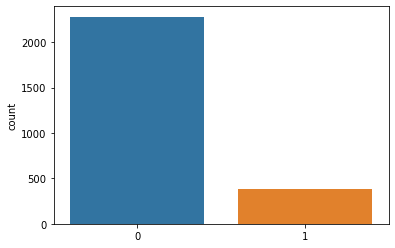

In [83]:
# converts 2d array to 1d array
# the minority class is 386 and 
y_train_1darray = np.ravel(y_train)
print(np.bincount(y_train_1darray))
sns.countplot(y_train_1darray)

In [84]:
# performing smote on training data
sm = SMOTE(sampling_strategy={1:772}, random_state=0)
x_res, y_res = sm.fit_resample(x_train, y_train)

In [85]:
# converts 2d array to 1d array
# the minority class has now become in the ration of 2:5
y_res_1darray = np.ravel(y_res)
np.bincount(y_res_1darray)

array([2280,  772], dtype=int64)

<AxesSubplot:ylabel='count'>

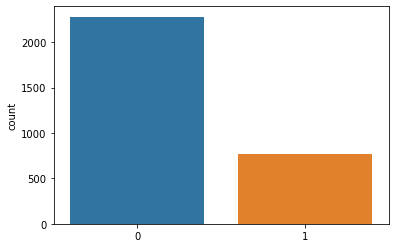

In [86]:
sns.countplot(y_res_1darray)

In [87]:
# now will train the model on the resampled training set using smote
# smote will be done only for training data
# doubled the minority class i.e 1 (churn) from 386 to 772
# Increased the minority class only for training data
# will check on test data after training the model with smote

df_scaled_sm = pd.DataFrame(columns=[['Models','Accurancy_tr','Accuracy_ts','F1-score_1']])
tr_acc_list = []
ts_acc_list = []
ts_f1_list  = []

# Logistic Regression
print('Logistic Regression with SMOTE')
lr_model_sm         = LogisticRegression(random_state= 33)
lr_model_sm.fit(x_res,y_res)
y_pred_train_lr_sm  = lr_model_sm.predict(x_res)#x_train
y_pred_test_lr_sm   = lr_model_sm.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_res, y_pred_train_lr_sm),2))#y_train
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_lr_sm),2))
print(np.round(confusion_matrix(y_test,y_pred_test_lr_sm),2))
print(classification_report(y_test,y_pred_test_lr_sm))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_res, y_pred_train_lr_sm),2))#y_train
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_lr_sm),2))

cl_report_lr_sm = classification_report(y_test,y_pred_test_lr_sm, output_dict=True)
tr_acc_list.append(np.round(accuracy_score(y_res, y_pred_train_lr_sm),2)) 
ts_acc_list.append(np.round(accuracy_score(y_test,y_pred_test_lr_sm),2)) 
ts_f1_list.append(np.round(cl_report_lr_sm['1']['f1-score'],2))

# Gaussian NB
print('\n\nGaussian NB')
gnb_model_sm = GaussianNB()
gnb_model_sm.fit(x_res, y_res)
y_pred_train_gnb_sm = gnb_model_sm.predict(x_res)
y_pred_test_gnb_sm  = gnb_model_sm.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_res, y_pred_train_gnb_sm),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_gnb_sm),2))
print(np.round(confusion_matrix(y_test,y_pred_test_gnb_sm),2))
print(classification_report(y_test,y_pred_test_gnb_sm))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_res, y_pred_train_gnb_sm),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_gnb_sm),2))

cl_report_gnb_sm = classification_report(y_test,y_pred_test_gnb_sm, output_dict=True)
tr_acc_list.append(np.round(accuracy_score(y_res, y_pred_train_gnb_sm),2)) 
ts_acc_list.append(np.round(accuracy_score(y_test,y_pred_test_gnb_sm),2)) 
ts_f1_list.append(np.round(cl_report_gnb_sm['1']['f1-score'],2))

#Decision Tree
print('\nDecision Tree')
dt_model_sm = DecisionTreeClassifier(random_state= 131)
dt_model_sm.fit(x_res,y_res)
y_pred_train_dt_sm = dt_model_sm.predict(x_res)
y_pred_test_dt_sm  = dt_model_sm.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_res, y_pred_train_dt_sm),2))
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_dt_sm),2))
print(np.round(confusion_matrix(y_test,y_pred_test_dt_sm),2))
print(classification_report(y_test,y_pred_test_dt_sm))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_res, y_pred_train_dt_sm),2))
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_dt_sm),2))

cl_report_dt_sm = classification_report(y_test,y_pred_test_dt_sm, output_dict=True)
tr_acc_list.append(np.round(accuracy_score(y_res, y_pred_train_dt_sm),2)) 
ts_acc_list.append(np.round(accuracy_score(y_test,y_pred_test_dt_sm),2)) 
ts_f1_list.append(np.round(cl_report_dt_sm['1']['f1-score'],2))


# Random Forest
print('\nRandom Forest with SMOTE')
rf_model_sm = RandomForestClassifier(n_estimators=100, max_depth= 5)
rf_model_sm.fit(x_res,y_res)
y_pred_train_rf_sm = rf_model_sm.predict(x_res)#x_train
y_pred_test_rf_sm  = rf_model_sm.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_res, y_pred_train_rf_sm),2))#y_train
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_rf_sm),2))
print(np.round(confusion_matrix(y_test,y_pred_test_rf_sm),2))
print(classification_report(y_test,y_pred_test_rf_sm))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_res, y_pred_train_rf_sm),2))#y_train
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_rf_sm),2))

cl_report_rf_sm = classification_report(y_test,y_pred_test_rf_sm, output_dict=True)
tr_acc_list.append(np.round(accuracy_score(y_res, y_pred_train_rf_sm),2)) 
ts_acc_list.append(np.round(accuracy_score(y_test,y_pred_test_rf_sm),2)) 
ts_f1_list.append(np.round(cl_report_rf_sm['1']['f1-score'],2))

#xgboost classifier
print('\nXgboost with SMOTE')
xgb_model_sm = XGBClassifier()
xgb_model_sm.fit(x_res,y_res)
y_pred_train_xgb_sm  = xgb_model_sm.predict(x_res)#x_train
y_pred_test_xgb_sm   = xgb_model_sm.predict(x_test)

print("Training Accuracy = ",np.round(accuracy_score(y_res, y_pred_train_xgb_sm),2))#y_train
print("Testing Accuracy = ",np.round(accuracy_score(y_test,y_pred_test_xgb_sm),2))
print(np.round(confusion_matrix(y_test,y_pred_test_xgb_sm),2))
print(classification_report(y_test,y_pred_test_xgb_sm))
print("Training ROC AUC score= ",np.round(roc_auc_score(y_res, y_pred_train_xgb_sm),2))#y_train
print("Testing ROC AUC score= ",np.round(roc_auc_score(y_test,y_pred_test_xgb_sm),2))

cl_report_xgb_sm = classification_report(y_test,y_pred_test_xgb_sm, output_dict=True)
tr_acc_list.append(np.round(accuracy_score(y_res, y_pred_train_xgb_sm),2)) 
ts_acc_list.append(np.round(accuracy_score(y_test,y_pred_test_xgb_sm),2)) 
ts_f1_list.append(np.round(cl_report_xgb_sm['1']['f1-score'],2))

print('\n\nSmote Score Table')
model_string =['LR', 'NB', 'DT','RF','XGBoost'] 
df_scaled_sm['Models'] = model_string
df_scaled_sm['Accurancy_tr'] = tr_acc_list
df_scaled_sm['Accuracy_ts'] = ts_acc_list
df_scaled_sm['F1-score_1'] = ts_f1_list
df_scaled_sm

Logistic Regression with SMOTE
Training Accuracy =  0.81
Testing Accuracy =  0.85
[[526  44]
 [ 59  38]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       570
           1       0.46      0.39      0.42        97

    accuracy                           0.85       667
   macro avg       0.68      0.66      0.67       667
weighted avg       0.84      0.85      0.84       667

Training ROC AUC score=  0.68
Testing ROC AUC score=  0.66


Gaussian NB
Training Accuracy =  0.84
Testing Accuracy =  0.85
[[511  59]
 [ 38  59]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       570
           1       0.50      0.61      0.55        97

    accuracy                           0.85       667
   macro avg       0.72      0.75      0.73       667
weighted avg       0.87      0.85      0.86       667

Training ROC AUC score=  0.77
Testing ROC AUC score=  0.75

Decision Tree
Training Accuracy = 

,Models,Accurancy_tr,Accuracy_ts,F1-score_1
0,LR,0.81,0.85,0.42
1,NB,0.84,0.85,0.55
2,DT,1.00,0.93,0.78
3,RF,0.96,0.97,0.88
4,XGBoost,1.00,0.98,0.94


In [88]:
df_scaled

,Models,Accurancy_tr,Accuracy_ts,F1-score_1
0,LR,0.86,0.87,0.40
1,NB,0.85,0.86,0.54
2,DT,1.00,0.93,0.79
3,RF,0.88,0.87,0.22
4,XGBoost,1.00,0.98,0.92


#### F1 score for all models increased ie performing better with SMOTE 

# Model Optimization - GridSearchCV

In [15]:
Accu_list_tr = []
Accu_list_ts = []
F1_churn_ts = []
F1_nonchurn_ts = []
df_final1 = pd.DataFrame(columns=['Models','TR_Accu','TS_Accu','TS_churn_f1_score', 'TS_nonchurn_f1_score'])

In [48]:
X = df.iloc[:,:-1]
print(X.shape)
y = df[['churn']]
print(y.shape)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=30, stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
x_train

(3333, 13)
(3333, 1)
(2666, 13)
(667, 13)
(2666, 1)
(667, 1)


array([[ 0.97787485, -0.61839626, -0.59175986, ..., -1.69213243,
        -0.19483061, -0.13996744],
       [-0.20255123, -0.61839626, -0.59175986, ..., -1.89657211,
         0.61789834,  0.74568906],
       [-0.32812847, -0.61839626, -0.59175986, ..., -0.05661501,
         0.21153386, -0.37995178],
       ...,
       [ 0.40021953, -0.61839626, -0.59175986, ..., -0.92548364,
         1.83699177,  0.18953487],
       [ 0.27464229,  1.6170861 ,  0.5772914 , ..., -0.41438444,
        -0.60119509,  0.09715995],
       [-0.10208944, -0.61839626, -0.59175986, ...,  1.0166933 ,
        -1.00755957,  0.37904632]])

### GridsearchCV -  Random Forest

In [91]:
rf_model = RandomForestClassifier(random_state=42)
rf_model_tweaked = GridSearchCV(estimator= rf_model, param_grid = { 'criterion' : ["gini", "entropy"],
                                                                   'max_depth' :[2,3,4,5,6,7],
                                                                    'n_estimators':[50,80,100,120,150],
                                                                    'min_samples_split' : [2,3,4,5]                                                                     
                                                                   })
rf_model_tweaked.fit(x_train,y_train)
print(rf_model_tweaked.best_params_)
print(rf_model_tweaked.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 150}
0.9763672520044129


Training Accuracy =  0.9789947486871718
Testing Accuracy  =  0.9835082458770614
Confusion Matrix =  [[570   0]
 [ 11  86]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       570
           1       1.00      0.89      0.94        97

    accuracy                           0.98       667
   macro avg       0.99      0.94      0.97       667
weighted avg       0.98      0.98      0.98       667



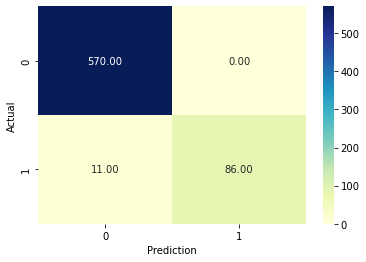

In [17]:
# training the standardized model with gridsearch params
rf_model_gsc = RandomForestClassifier(n_estimators=150, max_depth= 7, criterion='gini', min_samples_split=5)
rf_model_gsc.fit(x_train,y_train)
y_pred_train_rf_gsc = rf_model_gsc.predict(x_train)
y_pred_test_rf_gsc  = rf_model_gsc.predict(x_test)

# evaluation metrics
print("Training Accuracy = ",accuracy_score(y_train,y_pred_train_rf_gsc))
print("Testing Accuracy  = ",accuracy_score(y_test,y_pred_test_rf_gsc)) 
print("Confusion Matrix = ", confusion_matrix(y_test,y_pred_test_rf_gsc))
print(classification_report(y_test,y_pred_test_rf_gsc))

sns.heatmap(confusion_matrix(y_test,y_pred_test_rf_gsc), annot=True, fmt='.2f', cmap='YlGnBu')
plt.xlabel('Prediction')
plt.ylabel('Actual')

cl_report_rf_gsc = classification_report(y_test,y_pred_test_rf_gsc, output_dict=True)
Accu_list_tr.append(np.round(accuracy_score(y_train, y_pred_train_rf_gsc),2)) 
Accu_list_ts.append(np.round(accuracy_score(y_test,y_pred_test_rf_gsc),2)) 
F1_churn_ts.append(np.round(cl_report_rf_gsc['1']['f1-score'],2))
F1_nonchurn_ts.append(np.round(cl_report_rf_gsc['0']['f1-score'],2))

#print(Accu_list_tr)
#print(Accu_list_ts)
#print(F1_list_ts)

In [18]:
# k-fold cross validation for random forest
kfold = StratifiedKFold(n_splits=10, shuffle=True)

tr_results_kfold_rf = cross_val_score(rf_model_gsc, x_train, y_train, cv=kfold)
print("Training Accuracy\n", tr_results_kfold_rf)
Accu_kf_tr = [np.round(item,2) for item in tr_results_kfold_rf]

ts_results_kfold_rf = cross_val_score(rf_model_gsc, x_test, y_test, cv=kfold)
print("\nTesting Accuracy\n",ts_results_kfold_rf)
Accu_kf_ts = [np.round(item,2) for item in ts_results_kfold_rf]

ts_results_kfold_rf_f1 = cross_val_score(rf_model_gsc, x_test, y_test, cv=kfold, scoring='f1')
print("\nTest F1 score\n",ts_results_kfold_rf_f1)
f1_kf_ts = Accu_kf_ts = [np.round(item,2) for item in ts_results_kfold_rf_f1]

df_kfold_rf = pd.DataFrame()
df_kfold_rf = pd.DataFrame([Accu_kf_tr,Accu_kf_ts,f1_kf_ts], columns=['1','2','3','4','5','6','7','8','9','10'])
df_kfold_rf.insert(0,'Random_Forest', ['Trainig Accuracy','Testing Accuracy','Test_overall_F1_score'])
df_kfold_rf

Training Accuracy
 [0.94007491 0.99250936 0.97378277 0.97378277 0.97378277 0.97378277
 0.98496241 0.97744361 0.97744361 0.96240602]

Testing Accuracy
 [0.91044776 0.94029851 0.97014925 0.92537313 0.95522388 0.97014925
 0.94029851 1.         0.96969697 0.95454545]

Test F1 score
 [0.57142857 0.9        0.82352941 0.66666667 0.88888889 0.66666667
 0.88888889 0.5        0.94117647 0.875     ]


,Random_Forest,1,2,3,4,5,6,7,8,9,10
0,Trainig Accuracy,0.94,0.99,0.97,0.97,0.97,0.97,0.98,0.98,0.98,0.96
1,Testing Accuracy,0.57,0.90,0.82,0.67,0.89,0.67,0.89,0.50,0.94,0.88
2,Test_overall_F1_score,0.57,0.90,0.82,0.67,0.89,0.67,0.89,0.50,0.94,0.88


### GridSearchCV - XGBoost

In [95]:
#training the Smote model with Gridsearch CV for XGBoost
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'learning_rate': [0.05,0.03], # `eta` value
              'max_depth': [3,4,5,6,7,8],
              'n_estimators': [10, 50, 100, 150], #number of trees, change it to 100 for better results
             }

xgb_model = XGBClassifier()
xgb_model_tweaked = GridSearchCV(estimator= xgb_model, param_grid= parameters)
xgb_model_tweaked.fit(x_train,y_train)
print(xgb_model_tweaked.best_params_)
print(xgb_model_tweaked.best_score_)


[12:53:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:53:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:53:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:53:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:53:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:53:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:53:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:37:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy =  0.9786196549137285
Testing Accuracy  =  0.9865067466266867
Confusion Matrix =  [[570   0]
 [  9  88]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       570
           1       1.00      0.91      0.95        97

    accuracy                           0.99       667
   macro avg       0.99      0.95      0.97       667
weighted avg       0.99      0.99      0.99       667



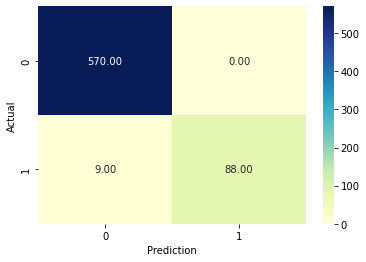

In [19]:
# training the standardized model with gridsearch params
xgb_model_gsc = XGBClassifier(n_estimators=100, max_depth= 3, learning_rate=0.05,  nthread = 4)
xgb_model_gsc.fit(x_train,y_train)
y_pred_train_xgb_gsc = xgb_model_gsc.predict(x_train)
y_pred_test_xgb_gsc  = xgb_model_gsc.predict(x_test)

# evaluation metrics
print("Training Accuracy = ",accuracy_score(y_train,y_pred_train_xgb_gsc))
print("Testing Accuracy  = ",accuracy_score(y_test,y_pred_test_xgb_gsc)) 
print("Confusion Matrix = ", confusion_matrix(y_test,y_pred_test_xgb_gsc))
print(classification_report(y_test,y_pred_test_xgb_gsc))

sns.heatmap(confusion_matrix(y_test,y_pred_test_xgb_gsc), annot=True, fmt='.2f', cmap='YlGnBu')
plt.xlabel('Prediction')
plt.ylabel('Actual')

cl_report_xgb_gsc = classification_report(y_test,y_pred_test_xgb_gsc, output_dict=True)
Accu_list_tr.append(np.round(accuracy_score(y_train, y_pred_train_xgb_gsc),2)) 
Accu_list_ts.append(np.round(accuracy_score(y_test,y_pred_test_xgb_gsc),2)) 
F1_churn_ts.append(np.round(cl_report_xgb_gsc['1']['f1-score'],2))
F1_nonchurn_ts.append(np.round(cl_report_xgb_gsc['0']['f1-score'],2))


In [20]:
# k-fold cross validation for XGBoost
kfold = StratifiedKFold(n_splits=10, shuffle=True)

tr_results_kfold_xgb = cross_val_score(xgb_model_gsc, x_train, y_train, cv=kfold)
print("\n\nTraining Accuracy\n ",tr_results_kfold_xgb,"\n\n")
Accu_kf_tr_xgb = [np.round(item,2) for item in tr_results_kfold_xgb]

ts_results_kfold_xgb = cross_val_score(xgb_model_gsc, x_test, y_test, cv=kfold)
print("\n\nTesting Accuracy\n ",ts_results_kfold_rf)
Accu_kf_ts_xgb = [np.round(item,2) for item in ts_results_kfold_xgb]

ts_results_kfold_xgb_f1 = cross_val_score(xgb_model_gsc, x_test, y_test, cv=kfold, scoring='f1')
print("\nTest F1 score\n",ts_results_kfold_xgb_f1)
f1_kf_ts_xgb = [np.round(item,2) for item in ts_results_kfold_xgb_f1]


df_kfold_xgb = pd.DataFrame()
df_kfold_xgb = pd.DataFrame([Accu_kf_tr_xgb,Accu_kf_ts_xgb,f1_kf_ts_xgb], columns=['1','2','3','4','5','6','7','8','9','10'])
df_kfold_xgb.insert(0,'XGBoost', ['Trainig Accuracy','Testing Accuracy','Test_overall_F1_score'])
df_kfold_xgb

[12:37:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:37:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:37:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Test F1 score
 [0.94736842 0.94736842 1.         1.         0.8888888

,XGBoost,1,2,3,4,5,6,7,8,9,10
0,Trainig Accuracy,0.98,0.97,0.97,0.97,0.98,0.99,0.97,0.96,0.99,0.99
1,Testing Accuracy,1.00,0.97,0.99,1.00,1.00,0.97,0.97,0.98,0.98,0.94
2,Test_overall_F1_score,0.95,0.95,1.00,1.00,0.89,0.89,0.95,0.88,0.94,0.88


### GridSearchCV - Decision Tree

In [98]:
dt_model = DecisionTreeClassifier(random_state=52)
dt_model_tweaked = GridSearchCV(estimator= dt_model, param_grid = { 'criterion' : ["gini", "entropy"],
                                                                   'max_depth' :[2,3,4,5,6,7],
                                                                    'min_samples_split' : [2,3,4,5]                                                                                                   
                                                                   })
dt_model_tweaked.fit(x_train,y_train)
print(dt_model_tweaked.best_params_)
print(dt_model_tweaked.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
0.9756181883340009


Training Accuracy =  0.9793698424606152
Testing Accuracy  =  0.9790104947526237
Confusion Matrix =  [[568   2]
 [ 12  85]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       570
           1       0.98      0.88      0.92        97

    accuracy                           0.98       667
   macro avg       0.98      0.94      0.96       667
weighted avg       0.98      0.98      0.98       667



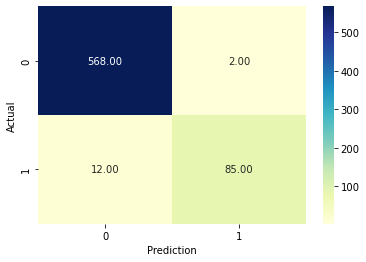

In [21]:
#training Decision Tree with Gridsearch CV best params
dt_model_gsc = DecisionTreeClassifier(max_depth= 5, criterion ='gini', min_samples_split=2, random_state=63)
dt_model_gsc.fit(x_train,y_train)
y_pred_train_dt_gsc = dt_model_gsc.predict(x_train)
y_pred_test_dt_gsc  = dt_model_gsc.predict(x_test)

# evaluation metrics
print("Training Accuracy = ",accuracy_score(y_train,y_pred_train_dt_gsc))
print("Testing Accuracy  = ",accuracy_score(y_test,y_pred_test_dt_gsc)) 
print("Confusion Matrix = ", confusion_matrix(y_test,y_pred_test_dt_gsc))
print(classification_report(y_test,y_pred_test_dt_gsc))

sns.heatmap(confusion_matrix(y_test,y_pred_test_dt_gsc), annot=True, fmt='.2f', cmap='YlGnBu')
plt.xlabel('Prediction')
plt.ylabel('Actual')

cl_report_dt_gsc = classification_report(y_test,y_pred_test_dt_gsc, output_dict=True)
Accu_list_tr.append(np.round(accuracy_score(y_train, y_pred_train_dt_gsc),2)) 
Accu_list_ts.append(np.round(accuracy_score(y_test, y_pred_test_dt_gsc),2)) 
F1_churn_ts.append(np.round(cl_report_dt_gsc['1']['f1-score'],2))
F1_nonchurn_ts.append(np.round(cl_report_dt_gsc['0']['f1-score'],2))


In [22]:
# k-fold cross validation for Decision Tree
kfold = StratifiedKFold(n_splits=10, shuffle=True)

tr_results_kfold_dt = cross_val_score(dt_model_gsc, x_train, y_train, cv=kfold)
print("Training Accuracy\n", tr_results_kfold_dt)
Accu_kf_tr_dt = [np.round(item,2) for item in tr_results_kfold_dt]

ts_results_kfold_dt = cross_val_score(dt_model_gsc, x_test, y_test, cv=kfold)
print("\nTesting Accuracy\n",ts_results_kfold_rf)
Accu_kf_ts_dt = [np.round(item,2) for item in ts_results_kfold_dt] 

ts_results_kfold_dt_f1 = cross_val_score(dt_model_gsc, x_test, y_test, cv=kfold, scoring='f1')
print("\nTest F1 score\n",ts_results_kfold_dt_f1)
f1_kf_ts_dt = [np.round(item,2) for item in ts_results_kfold_dt_f1] 

df_kfold_dt = pd.DataFrame()
df_kfold_dt = pd.DataFrame([Accu_kf_tr_dt,Accu_kf_ts_dt,f1_kf_ts_dt], columns=['1','2','3','4','5','6','7','8','9','10'])
df_kfold_dt.insert(0,'Decision Tree', ['Trainig Accuracy','Testing Accuracy','Test_overall_F1_score'])
df_kfold_dt

Training Accuracy
 [0.97378277 0.97003745 0.97378277 0.98127341 0.97752809 0.98127341
 0.96616541 0.97368421 0.97368421 0.96616541]

Testing Accuracy
 [0.91044776 0.94029851 0.97014925 0.92537313 0.95522388 0.97014925
 0.94029851 1.         0.96969697 0.95454545]

Test F1 score
 [0.95238095 0.88888889 0.73684211 0.94736842 0.88888889 0.82352941
 0.94736842 1.         0.94736842 0.88888889]


,Decision Tree,1,2,3,4,5,6,7,8,9,10
0,Trainig Accuracy,0.97,0.97,0.97,0.98,0.98,0.98,0.97,0.97,0.97,0.97
1,Testing Accuracy,0.99,0.99,0.99,1.00,0.94,0.96,0.96,0.98,0.95,0.97
2,Test_overall_F1_score,0.95,0.89,0.74,0.95,0.89,0.82,0.95,1.00,0.95,0.89


### Inferences

In [23]:
print('\n\nGridsearchCV Score Table')

model_string =['RF','XGBoost','DT'] 

#print(Accu_list_tr)

df_final1['Models'] = model_string
df_final1['TR_Accu'] = Accu_list_tr
df_final1['TS_Accu']  = Accu_list_ts
df_final1['TS_churn_f1_score']   = F1_churn_ts
df_final1['TS_nonchurn_f1_score']   = F1_nonchurn_ts
df_final1




GridsearchCV Score Table


,Models,TR_Accu,TS_Accu,TS_churn_f1_score,TS_nonchurn_f1_score
0,RF,0.98,0.98,0.94,0.99
1,XGBoost,0.98,0.99,0.95,0.99
2,DT,0.98,0.98,0.92,0.99


In [71]:
df

,account_length,voice_mail_plan,voice_mail_messages,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,evening_calls,night_calls,international_calls,total_charge,churn
0,128,1,25,197.4,244.7,10.0,1,0,110,99,91,3,75.56,0
1,107,1,26,195.5,254.4,13.7,1,0,123,103,103,3,59.24,0
2,137,0,0,121.2,162.6,12.2,0,0,114,110,104,5,62.29,0
3,84,0,0,61.9,196.9,6.6,2,1,71,88,89,7,66.80,0
4,75,0,0,148.3,186.9,10.1,3,1,113,122,121,3,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,215.5,279.1,9.9,2,0,77,126,83,6,60.10,0
3329,68,0,0,153.4,191.3,9.6,3,0,57,55,123,4,63.53,0
3330,28,0,0,288.8,191.9,14.1,2,0,109,58,91,6,67.74,0
3331,184,0,0,159.6,139.2,5.0,2,1,105,84,137,10,57.53,0


In [72]:
df.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'evening_calls', 'night_calls', 'international_calls', 'total_charge',
       'churn'],
      dtype='object')

# pickle file

In [63]:
import pickle

In [64]:
# creating a pickle file
filename = 'tele_churn_trained_model.sav'
pickle.dump(xgb_model_gsc,open(filename, 'wb'))

In [65]:
# loading the saved model 
loaded_model = pickle.load(open('tele_churn_trained_model.sav','rb'))